# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

In [187]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [188]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [189]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [190]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [191]:
def draw_styled_landmarks(image, results):

    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 


In [178]:
mp_drawing.draw_landmarks()

TypeError: draw_landmarks() missing 2 required positional arguments: 'image' and 'landmark_list'

In [184]:
cap = cv2.VideoCapture(0)
HEIGHT = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) # webcam video frame height
WIDTH = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) # webcam video frame width
FPS = int(cap.get(cv2.CAP_PROP_FPS)) # webcam video fram rate 
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [179]:
draw_styled_landmarks(frame, results)

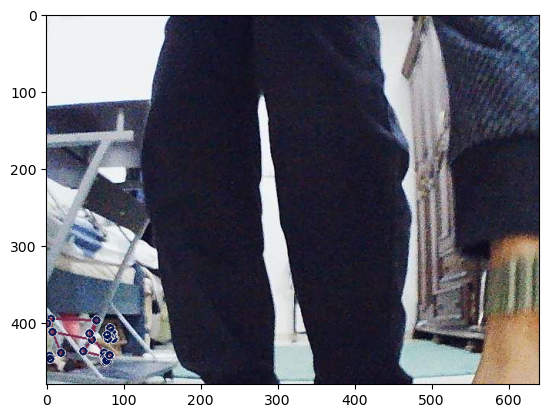

In [180]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [ ]:
results.pose_landmarks

In [192]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    return pose

In [ ]:
result_test = extract_keypoints(results)

In [ ]:
result_test.shape

# 4. Setup Folders for Collection

In [ ]:
# # Path for exported data, numpy arrays
# DATA_PATH = os.path.join('MP_Data') 

# # Actions that we try to detect
# actions = np.array(['hello', 'thanks', 'iloveyou'])

# # Thirty videos worth of data
# no_sequences = 30

# # Videos are going to be 30 frames in length
# sequence_length = 30

# # Folder start
# start_folder = 30

In [202]:
actions = np.array(['pushup','squat','lunge'])
num_classes = len(actions)

In [197]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join(os. getcwd(),'data') 
print(DATA_PATH)

# make directory if it does not exist yet
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)

# Actions/exercises that we try to detect
actions = np.array(['pushup','squat','lunge'])
num_classes = len(actions)

# How many videos worth of data
no_sequences = 50

# Videos are going to be this many frames in length
sequence_length = 30

# Folder start
# Change this to collect more data and not lose previously collected data
start_folder = 101


C:\Users\theak\gym_pose_trainer\gym_pose_trainer\data


In [203]:
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [199]:
# Colors associated with each exercise (e.g., curls are denoted by blue, squats are denoted by orange, etc.)
colors = [(245,117,16), (117,245,16), (16,117,245)]

In [200]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [204]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [205]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [206]:
label_map = {label:num for num, label in enumerate(actions)}

In [207]:
label_map

{'pushup': 0, 'squat': 1, 'lunge': 2}

In [208]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [16]:
# # Load and organize recorded training data
# sequences, labels = [], []
# for action in actions:
#     for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
#         window = []
#         for frame_num in range(sequence_length):         
#             # LSTM input data
#             res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
#             window.append(res)  
            
#         sequences.append(window)
#         labels.append(label_map[action])

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\theak\\gym_pose_trainer\\gym_pose_trainer\\data\\pushup\\152\\0.npy'

In [209]:
# Make sure first dimensions of arrays match
X = np.array(sequences)
y = to_categorical(labels).astype(int)
print(X.shape, y.shape)

(150, 30, 132) (150, 3)


In [210]:
np.array(sequences).shape

(150, 30, 132)

In [211]:
np.array(labels).shape

(150,)

In [212]:
X = np.array(sequences)

In [213]:
X.shape

(150, 30, 132)

In [214]:
y = to_categorical(labels).astype(int)

In [60]:
# Split into training, validation, and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)
print(X_train.shape, y_train.shape)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=15/90, random_state=2)
print(X_train.shape, X_test.shape,X_val.shape)

(135, 30, 132) (135, 3)
(112, 30, 132) (15, 30, 132) (23, 30, 132)


In [44]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [181]:
y_test.shape

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]])

# 7. Build and Train LSTM Neural Network

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.layers import (LSTM, Dense, Concatenate, Attention, Dropout, Softmax,
                                     Input, Flatten, Activation, Bidirectional, Permute, multiply, 
                                     ConvLSTM2D, MaxPooling3D, TimeDistributed, Conv2D, MaxPooling2D)

from scipy import stats

# disable some of the tf/keras training warnings 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "3"
tf.get_logger().setLevel("ERROR")
tf.autograph.set_verbosity(1)

# suppress untraced functions warning
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

In [69]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.callbacks import TensorBoard

In [70]:
# Callbacks to be used during neural network training 
es_callback = EarlyStopping(monitor='val_loss', min_delta=5e-4, patience=10, verbose=0, mode='min')
lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001, verbose=0, mode='min')
chkpt_callback = ModelCheckpoint(filepath=DATA_PATH, monitor='val_loss', verbose=0, save_best_only=True, 
                                 save_weights_only=False, mode='min', save_freq=1)

# Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

# some hyperparamters
batch_size = 32
max_epochs = 500

In [71]:
# Set up Tensorboard logging and callbacks
NAME = f"ExerciseRecognition-LSTM-{int(time.time())}"
log_dir = os.path.join(os.getcwd(), 'logs', NAME,'')
tb_callback = TensorBoard(log_dir=log_dir)

callbacks = [tb_callback, es_callback, lr_callback, chkpt_callback]

In [72]:
lstm = Sequential()
lstm.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(sequence_length, 132)))
lstm.add(LSTM(128, return_sequences=True, activation='relu'))
lstm.add(LSTM(64, return_sequences=False, activation='relu'))
lstm.add(Dense(64, activation='relu'))
lstm.add(Dense(32, activation='relu'))
lstm.add(Dense(actions.shape[0], activation='softmax'))
print(lstm.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 30, 64)            50432     
                                                                 
 lstm_13 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_14 (LSTM)              (None, 64)                49408     
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 3)                 99        
                                                                 
Total params: 204995 (800.76 KB)
Trainable params: 204

In [73]:
lstm.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
lstm.fit(X_train, y_train, batch_size=batch_size, epochs=max_epochs, validation_data=(X_val, y_val))

Epoch 1/500
4/4 [==============================] - 9s 420ms/step - loss: 144.1401 - categorical_accuracy: 0.2411 - val_loss: 7395.4253 - val_categorical_accuracy: 0.4348
Epoch 2/500
4/4 [==============================] - 0s 79ms/step - loss: 2817.0103 - categorical_accuracy: 0.2768 - val_loss: 30.9900 - val_categorical_accuracy: 0.2609
Epoch 3/500
4/4 [==============================] - 0s 79ms/step - loss: 8.7191 - categorical_accuracy: 0.3750 - val_loss: 5.4167 - val_categorical_accuracy: 0.2609
Epoch 4/500
4/4 [==============================] - 0s 79ms/step - loss: 5.3078 - categorical_accuracy: 0.3571 - val_loss: 1.0943 - val_categorical_accuracy: 0.5217
Epoch 5/500
4/4 [==============================] - 0s 79ms/step - loss: 2.6879 - categorical_accuracy: 0.3214 - val_loss: 1.1086 - val_categorical_accuracy: 0.3478
Epoch 6/500
4/4 [==============================] - 0s 79ms/step - loss: 1.1770 - categorical_accuracy: 0.2857 - val_loss: 1.1548 - val_categorical_accuracy: 0.2609
Epoch 

Epoch 51/500
4/4 [==============================] - 0s 94ms/step - loss: 0.8802 - categorical_accuracy: 0.5089 - val_loss: 1.0286 - val_categorical_accuracy: 0.5217
Epoch 52/500
4/4 [==============================] - 0s 95ms/step - loss: 1.1160 - categorical_accuracy: 0.3571 - val_loss: 1.1040 - val_categorical_accuracy: 0.3478
Epoch 53/500
4/4 [==============================] - 0s 100ms/step - loss: 1.0657 - categorical_accuracy: 0.3304 - val_loss: 1.0737 - val_categorical_accuracy: 0.3478
Epoch 54/500
4/4 [==============================] - 0s 84ms/step - loss: 1.1327 - categorical_accuracy: 0.3125 - val_loss: 1.0709 - val_categorical_accuracy: 0.4783
Epoch 55/500
4/4 [==============================] - 0s 100ms/step - loss: 1.0573 - categorical_accuracy: 0.5089 - val_loss: 1.0327 - val_categorical_accuracy: 0.3913
Epoch 56/500
4/4 [==============================] - 0s 100ms/step - loss: 1.0573 - categorical_accuracy: 0.3125 - val_loss: 1.0028 - val_categorical_accuracy: 0.6087
Epoch 5

4/4 [==============================] - 0s 90ms/step - loss: 0.9140 - categorical_accuracy: 0.4464 - val_loss: 0.7930 - val_categorical_accuracy: 0.6957
Epoch 101/500
4/4 [==============================] - 0s 79ms/step - loss: 2.0182 - categorical_accuracy: 0.4196 - val_loss: 1.1541 - val_categorical_accuracy: 0.2609
Epoch 102/500
4/4 [==============================] - 0s 95ms/step - loss: 1.1139 - categorical_accuracy: 0.3571 - val_loss: 1.1540 - val_categorical_accuracy: 0.2609
Epoch 103/500
4/4 [==============================] - 0s 93ms/step - loss: 1.1131 - categorical_accuracy: 0.3571 - val_loss: 1.1506 - val_categorical_accuracy: 0.2609
Epoch 104/500
4/4 [==============================] - 0s 79ms/step - loss: 1.1096 - categorical_accuracy: 0.3571 - val_loss: 1.1456 - val_categorical_accuracy: 0.2609
Epoch 105/500
4/4 [==============================] - 0s 79ms/step - loss: 1.1835 - categorical_accuracy: 0.3571 - val_loss: 1.1402 - val_categorical_accuracy: 0.2609
Epoch 106/500
4/4 

4/4 [==============================] - 0s 101ms/step - loss: 1.0922 - categorical_accuracy: 0.3661 - val_loss: 1.1105 - val_categorical_accuracy: 0.2609
Epoch 150/500
4/4 [==============================] - 0s 90ms/step - loss: 1.0976 - categorical_accuracy: 0.3571 - val_loss: 1.1106 - val_categorical_accuracy: 0.2609
Epoch 151/500
4/4 [==============================] - 0s 85ms/step - loss: 1.0972 - categorical_accuracy: 0.3571 - val_loss: 1.1115 - val_categorical_accuracy: 0.2609
Epoch 152/500
4/4 [==============================] - 0s 79ms/step - loss: 1.0970 - categorical_accuracy: 0.3571 - val_loss: 1.1114 - val_categorical_accuracy: 0.2609
Epoch 153/500
4/4 [==============================] - 0s 93ms/step - loss: 1.0968 - categorical_accuracy: 0.3571 - val_loss: 1.1116 - val_categorical_accuracy: 0.2609
Epoch 154/500
4/4 [==============================] - 0s 95ms/step - loss: 1.0967 - categorical_accuracy: 0.3571 - val_loss: 1.1114 - val_categorical_accuracy: 0.2609
Epoch 155/500
4/4

4/4 [==============================] - 0s 84ms/step - loss: 1.0973 - categorical_accuracy: 0.3571 - val_loss: 1.1112 - val_categorical_accuracy: 0.2609
Epoch 199/500
4/4 [==============================] - 0s 79ms/step - loss: 1.0975 - categorical_accuracy: 0.3571 - val_loss: 1.1114 - val_categorical_accuracy: 0.2609
Epoch 200/500
4/4 [==============================] - 0s 95ms/step - loss: 1.0973 - categorical_accuracy: 0.3571 - val_loss: 1.1117 - val_categorical_accuracy: 0.2609
Epoch 201/500
4/4 [==============================] - 0s 100ms/step - loss: 1.0975 - categorical_accuracy: 0.3571 - val_loss: 1.1115 - val_categorical_accuracy: 0.2609
Epoch 202/500
4/4 [==============================] - 0s 95ms/step - loss: 1.0974 - categorical_accuracy: 0.3571 - val_loss: 1.1118 - val_categorical_accuracy: 0.2609
Epoch 203/500
4/4 [==============================] - 0s 95ms/step - loss: 1.0975 - categorical_accuracy: 0.3571 - val_loss: 1.1118 - val_categorical_accuracy: 0.2609
Epoch 204/500
4/4

4/4 [==============================] - 0s 86ms/step - loss: 1.0973 - categorical_accuracy: 0.3571 - val_loss: 1.1062 - val_categorical_accuracy: 0.2609
Epoch 248/500
4/4 [==============================] - 0s 100ms/step - loss: 1.0974 - categorical_accuracy: 0.3571 - val_loss: 1.1061 - val_categorical_accuracy: 0.2609
Epoch 249/500
4/4 [==============================] - 0s 100ms/step - loss: 1.0975 - categorical_accuracy: 0.3571 - val_loss: 1.1068 - val_categorical_accuracy: 0.2609
Epoch 250/500
4/4 [==============================] - 0s 97ms/step - loss: 1.0972 - categorical_accuracy: 0.3571 - val_loss: 1.1067 - val_categorical_accuracy: 0.2609
Epoch 251/500
4/4 [==============================] - 0s 95ms/step - loss: 1.0972 - categorical_accuracy: 0.3571 - val_loss: 1.1063 - val_categorical_accuracy: 0.2609
Epoch 252/500
4/4 [==============================] - 0s 100ms/step - loss: 1.0974 - categorical_accuracy: 0.3571 - val_loss: 1.1063 - val_categorical_accuracy: 0.2609
Epoch 253/500
4

4/4 [==============================] - 0s 79ms/step - loss: 1.0973 - categorical_accuracy: 0.3571 - val_loss: 1.1115 - val_categorical_accuracy: 0.2609
Epoch 297/500
4/4 [==============================] - 0s 85ms/step - loss: 1.0976 - categorical_accuracy: 0.3571 - val_loss: 1.1110 - val_categorical_accuracy: 0.2609
Epoch 298/500
4/4 [==============================] - 0s 95ms/step - loss: 1.0973 - categorical_accuracy: 0.3571 - val_loss: 1.1118 - val_categorical_accuracy: 0.2609
Epoch 299/500
4/4 [==============================] - 0s 95ms/step - loss: 1.0974 - categorical_accuracy: 0.3571 - val_loss: 1.1122 - val_categorical_accuracy: 0.2609
Epoch 300/500
4/4 [==============================] - 0s 100ms/step - loss: 1.0975 - categorical_accuracy: 0.3571 - val_loss: 1.1120 - val_categorical_accuracy: 0.2609
Epoch 301/500
4/4 [==============================] - 0s 90ms/step - loss: 1.0977 - categorical_accuracy: 0.3571 - val_loss: 1.1115 - val_categorical_accuracy: 0.2609
Epoch 302/500
4/4

4/4 [==============================] - 0s 85ms/step - loss: 1.0978 - categorical_accuracy: 0.3571 - val_loss: 1.1039 - val_categorical_accuracy: 0.2609
Epoch 346/500
4/4 [==============================] - 0s 84ms/step - loss: 1.0976 - categorical_accuracy: 0.3571 - val_loss: 1.1038 - val_categorical_accuracy: 0.2609
Epoch 347/500
4/4 [==============================] - 0s 84ms/step - loss: 1.0975 - categorical_accuracy: 0.3571 - val_loss: 1.1040 - val_categorical_accuracy: 0.2609
Epoch 348/500
4/4 [==============================] - 0s 84ms/step - loss: 1.0978 - categorical_accuracy: 0.3571 - val_loss: 1.1038 - val_categorical_accuracy: 0.2609
Epoch 349/500
4/4 [==============================] - 0s 95ms/step - loss: 1.0977 - categorical_accuracy: 0.3571 - val_loss: 1.1039 - val_categorical_accuracy: 0.2609
Epoch 350/500
4/4 [==============================] - 0s 95ms/step - loss: 1.0976 - categorical_accuracy: 0.3571 - val_loss: 1.1036 - val_categorical_accuracy: 0.2609
Epoch 351/500
4/4 

4/4 [==============================] - 0s 95ms/step - loss: 1.0973 - categorical_accuracy: 0.3571 - val_loss: 1.1116 - val_categorical_accuracy: 0.2609
Epoch 395/500
4/4 [==============================] - 0s 84ms/step - loss: 1.0972 - categorical_accuracy: 0.3571 - val_loss: 1.1118 - val_categorical_accuracy: 0.2609
Epoch 396/500
4/4 [==============================] - 0s 84ms/step - loss: 1.0973 - categorical_accuracy: 0.3571 - val_loss: 1.1124 - val_categorical_accuracy: 0.2609
Epoch 397/500
4/4 [==============================] - 0s 100ms/step - loss: 1.0973 - categorical_accuracy: 0.3571 - val_loss: 1.1119 - val_categorical_accuracy: 0.2609
Epoch 398/500
4/4 [==============================] - 0s 95ms/step - loss: 1.0972 - categorical_accuracy: 0.3571 - val_loss: 1.1110 - val_categorical_accuracy: 0.2609
Epoch 399/500
4/4 [==============================] - 0s 94ms/step - loss: 1.0974 - categorical_accuracy: 0.3571 - val_loss: 1.1109 - val_categorical_accuracy: 0.2609
Epoch 400/500
4/4

4/4 [==============================] - 0s 90ms/step - loss: 1.0972 - categorical_accuracy: 0.3571 - val_loss: 1.1114 - val_categorical_accuracy: 0.2609
Epoch 444/500
4/4 [==============================] - 0s 104ms/step - loss: 1.0975 - categorical_accuracy: 0.3571 - val_loss: 1.1120 - val_categorical_accuracy: 0.2609
Epoch 445/500
4/4 [==============================] - 0s 82ms/step - loss: 1.0973 - categorical_accuracy: 0.3571 - val_loss: 1.1120 - val_categorical_accuracy: 0.2609
Epoch 446/500
4/4 [==============================] - 0s 88ms/step - loss: 1.0976 - categorical_accuracy: 0.3571 - val_loss: 1.1116 - val_categorical_accuracy: 0.2609
Epoch 447/500
4/4 [==============================] - 0s 90ms/step - loss: 1.0979 - categorical_accuracy: 0.3571 - val_loss: 1.1092 - val_categorical_accuracy: 0.2609
Epoch 448/500
4/4 [==============================] - 0s 95ms/step - loss: 1.0970 - categorical_accuracy: 0.3571 - val_loss: 1.1088 - val_categorical_accuracy: 0.2609
Epoch 449/500
4/4

4/4 [==============================] - 0s 95ms/step - loss: 1.0976 - categorical_accuracy: 0.3571 - val_loss: 1.1068 - val_categorical_accuracy: 0.2609
Epoch 493/500
4/4 [==============================] - 0s 79ms/step - loss: 1.0976 - categorical_accuracy: 0.3571 - val_loss: 1.1070 - val_categorical_accuracy: 0.2609
Epoch 494/500
4/4 [==============================] - 0s 84ms/step - loss: 1.0972 - categorical_accuracy: 0.3571 - val_loss: 1.1068 - val_categorical_accuracy: 0.2609
Epoch 495/500
4/4 [==============================] - 0s 84ms/step - loss: 1.0972 - categorical_accuracy: 0.3571 - val_loss: 1.1061 - val_categorical_accuracy: 0.2609
Epoch 496/500
4/4 [==============================] - 0s 90ms/step - loss: 1.0972 - categorical_accuracy: 0.3571 - val_loss: 1.1060 - val_categorical_accuracy: 0.2609
Epoch 497/500
4/4 [==============================] - 0s 94ms/step - loss: 1.0972 - categorical_accuracy: 0.3571 - val_loss: 1.1066 - val_categorical_accuracy: 0.2609
Epoch 498/500
4/4 

In [48]:
# log_dir = os.path.join('Logs')
# tb_callback = TensorBoard(log_dir=log_dir)

In [49]:
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(actions.shape[0], activation='softmax'))

In [215]:
#trying nicholas
X = np.array(sequences)
y = to_categorical(labels).astype(int)


In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


In [217]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [218]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,132)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
print(lstm.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 30, 64)            50432     
                                                                 
 lstm_13 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_14 (LSTM)              (None, 64)                49408     
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 3)                 99        
                                                                 
Total params: 204995 (800.76 KB)
Trainable params: 204

In [219]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [220]:
model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback])

Epoch 1/100
5/5 [==============================] - 6s 48ms/step - loss: 1.0983 - categorical_accuracy: 0.4222
Epoch 2/100
5/5 [==============================] - 0s 39ms/step - loss: 0.9914 - categorical_accuracy: 0.4444
Epoch 3/100
5/5 [==============================] - 0s 44ms/step - loss: 0.8202 - categorical_accuracy: 0.6222
Epoch 4/100
5/5 [==============================] - 0s 40ms/step - loss: 0.6434 - categorical_accuracy: 0.6889
Epoch 5/100
5/5 [==============================] - 0s 43ms/step - loss: 0.5973 - categorical_accuracy: 0.8667
Epoch 6/100
5/5 [==============================] - 0s 40ms/step - loss: 0.3275 - categorical_accuracy: 0.9407
Epoch 7/100
5/5 [==============================] - 0s 44ms/step - loss: 0.2096 - categorical_accuracy: 0.9407
Epoch 8/100
5/5 [==============================] - 0s 39ms/step - loss: 0.2053 - categorical_accuracy: 0.9407
Epoch 9/100
5/5 [==============================] - 0s 44ms/step - loss: 0.1054 - categorical_accuracy: 0.9704
Epoch 10/1

5/5 [==============================] - 0s 32ms/step - loss: 2.4512e-04 - categorical_accuracy: 1.0000
Epoch 75/100
5/5 [==============================] - 0s 29ms/step - loss: 2.0995e-04 - categorical_accuracy: 1.0000
Epoch 76/100
5/5 [==============================] - 0s 30ms/step - loss: 2.0189e-04 - categorical_accuracy: 1.0000
Epoch 77/100
5/5 [==============================] - 0s 31ms/step - loss: 1.7752e-04 - categorical_accuracy: 1.0000
Epoch 78/100
5/5 [==============================] - 0s 30ms/step - loss: 1.5671e-04 - categorical_accuracy: 1.0000
Epoch 79/100
5/5 [==============================] - 0s 32ms/step - loss: 1.3731e-04 - categorical_accuracy: 1.0000
Epoch 80/100
5/5 [==============================] - 0s 28ms/step - loss: 1.2871e-04 - categorical_accuracy: 1.0000
Epoch 81/100
5/5 [==============================] - 0s 30ms/step - loss: 1.1933e-04 - categorical_accuracy: 1.0000
Epoch 82/100
5/5 [==============================] - 0s 30ms/step - loss: 1.1131e-04 - categor

In [157]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 30, 64)            50432     
                                                                 
 lstm_37 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_38 (LSTM)              (None, 64)                49408     
                                                                 
 dense_36 (Dense)            (None, 64)                4160      
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 3)                 99        
                                                                 
Total params: 204995 (800.76 KB)
Trainable params: 20

# 8. Make Predictions

In [221]:
res = model.predict(X_test)

1/1 [==============================] - 1s 709ms/step


In [222]:
actions[np.argmax(res[1])]

'pushup'

In [223]:
actions[np.argmax(y_test[1])]

'pushup'

# 9. Save Weights

In [224]:
model.save('my_model4.keras')

In [ ]:
del model

In [ ]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [225]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [226]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 46ms/step


In [227]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [228]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[10,  0],
        [ 0,  5]],

       [[12,  0],
        [ 0,  3]],

       [[ 8,  0],
        [ 0,  7]]], dtype=int64)

In [229]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [230]:
from scipy import stats

In [231]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

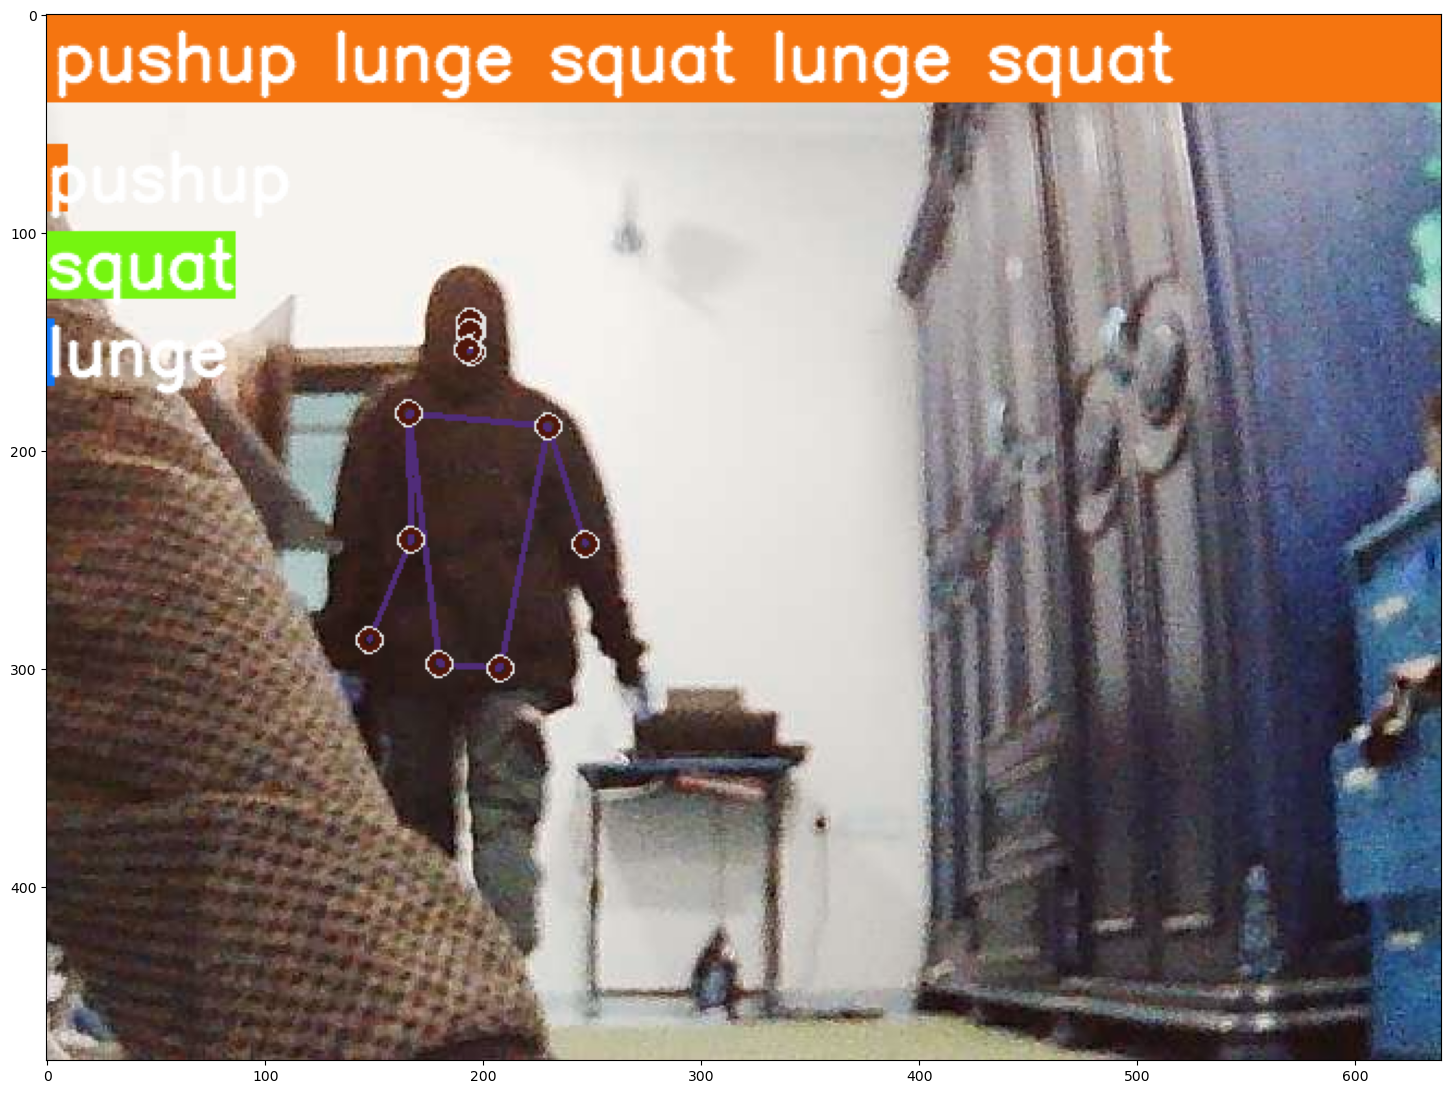

In [183]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [232]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 26ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
squat
<class 'mediapipe.pyth

1/1 [==============================] - 0s 22ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
squat
<class 'mediapipe.pyth

1/1 [==============================] - 0s 23ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
lunge
<class 'mediapipe.pyth

1/1 [==============================] - 0s 23ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
squat
<class 'mediapipe.pyth

1/1 [==============================] - 0s 22ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
squat
<class 'mediapipe.pyth

1/1 [==============================] - 0s 24ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
squat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
squat
<class 'mediapipe.pyth

1/1 [==============================] - 0s 31ms/step
pushup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
pushup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
pushup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
pushup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
pushup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
pushup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
pushup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
pushup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
pushup
<class 'media

1/1 [==============================] - 0s 21ms/step
pushup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
pushup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
pushup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
pushup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
pushup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
pushup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
pushup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
pushup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
pushup
<class 'media

1/1 [==============================] - 0s 28ms/step
pushup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
pushup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
pushup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
pushup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
pushup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
pushup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
pushup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
pushup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
pushup
<class 'media